In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset

In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [9]:
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape #Making random data and equal data of fraud and non_fraud

(492, 31)

In [11]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,77210.0,1.183517,0.199034,0.249722,0.728512,-0.365764,-1.023229,0.234440,-0.179404,-0.069100,...,0.005006,0.034423,0.032923,0.629001,0.404971,0.364978,-0.039752,0.008540,14.17,0
980,96863.0,1.988023,-0.396027,-1.316596,0.209533,0.192423,-0.016636,-0.271231,-0.048992,2.348962,...,-0.047746,0.246632,-0.000392,0.252809,0.178064,0.130174,-0.075179,-0.073277,36.25,0
981,9248.0,-4.672106,1.139986,2.003937,-0.822554,0.985827,-0.266939,2.105571,-2.309191,6.084085,...,-1.463189,0.229938,0.084400,0.532684,0.585504,0.068987,-0.592242,-0.758228,0.01,0
982,136521.0,1.740800,-0.574387,-3.392054,-0.468740,2.560745,3.047717,-0.168809,0.683853,0.417487,...,0.282200,0.514264,-0.120338,0.635989,0.231982,-0.097147,-0.011704,-0.008245,160.00,0


In [12]:
data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [13]:
x = data.drop("Class", axis = 1)
y=data['Class']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify =y)

In [15]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [16]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
y_train = y_train.to_numpy() #coverting data set to numpy array
y_test = y_test.to_numpy()

In [18]:
x_train.shape

(787, 30)

In [19]:
#neural network takes 3D data so we have to convert is to 3D
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
x_train.shape , x_test.shape

((787, 30, 1), (197, 30, 1))

### Build CNN

In [21]:
epochs=20
model = Sequential()
model.add(Conv1D(32,3, activation ='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 32)            128       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 27, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1728)              0

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=20, validation_data=(x_test,y_test), verbose = 1)

Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 0.4423 - accuracy: 0.8590 - val_loss: 0.5698 - val_accuracy: 0.4975
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2128 - accuracy: 0.9238 - val_loss: 0.6234 - val_accuracy: 0.4975
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1902 - accuracy: 0.9276 - val_loss: 0.6873 - val_accuracy: 0.4975
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1723 - accuracy: 0.9327 - val_loss: 0.6668 - val_accuracy: 0.4975
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.9428 - val_loss: 0.6721 - val_accuracy: 0.4975
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1600 - accuracy: 0.9466 - val_loss: 0.6008 - val_accuracy: 0.5127
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1315 - accuracy: 0.9530 - val_loss: 0.5756 - val_accuracy: 0.5533
Epoch 8/20
32/32 [==

In [24]:
def plot_Curve(hisory,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range , hisory.history['accuracy'])
    plt.plot(epoch_range , hisory.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc = 'upper left')
    plt.show()
    
    #Lose valuse
    plt.plot(epoch_range , hisory.history['loss'])
    plt.plot(epoch_range , hisory.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc = 'upper left')
    plt.show()

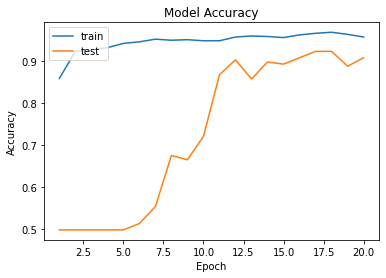

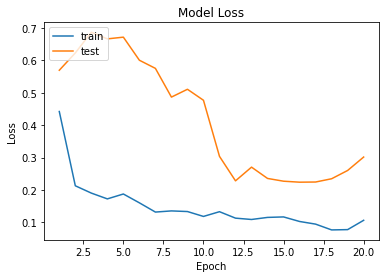

In [25]:
plot_Curve(history, epochs)

### Adding MaxPool

In [26]:
epochs=50
model = Sequential()
model.add(Conv1D(32,3, activation ='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2, activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))
          
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=epochs, validation_data=(x_test,y_test), verbose = 1)


Epoch 1/50
32/32 [==============================] - 1s 9ms/step - loss: 0.4899 - accuracy: 0.7853 - val_loss: 0.5276 - val_accuracy: 0.9188
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.8666 - val_loss: 0.4696 - val_accuracy: 0.9340
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.9047 - val_loss: 0.4324 - val_accuracy: 0.9340
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2802 - accuracy: 0.8958 - val_loss: 0.3634 - val_accuracy: 0.9340
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9199 - val_loss: 0.3230 - val_accuracy: 0.9391
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2225 - accuracy: 0.9199 - val_loss: 0.2736 - val_accuracy: 0.9340
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.9314 - val_loss: 0.2486 - val_accuracy: 0.9289
Epoch 8/50
32/32 [==

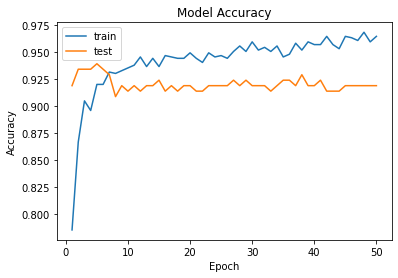

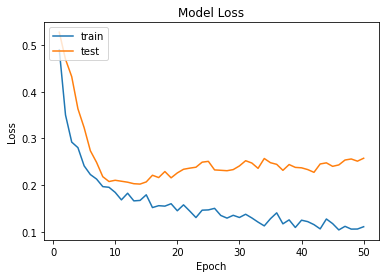

In [27]:
plot_Curve(history, epochs)